# Assignment 3: Job Salary Prediction (30 marks)

Student Name: Chaoyi Shi

Student ID: 1069250


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [14]:
# read train data set for semi- or unsupervised learning approaches.
# train data set
train_raw = pd.read_csv("./raw-data/train.csv")
train_tfidf = np.load("./tfidf-data/train-tfidf.npy")
train_embeddings = np.load("./embeddings-data/train-embeddings.npy")

# read valid data set as development set for model selection and tuning;
# valid dataset
valid_raw = pd.read_csv("./raw-data/valid.csv")
valid_tfidf= np.load("./tfidf-data/valid-tfidf.npy")
valid_embeddings=np.load("./embeddings-data/valid-embeddings.npy")

#read test data set for final evaluation in the Kaggle in-class competition
# test data set
test_raw = pd.read_csv("./raw-data/test.csv")
test_tfidf=np.load("./tfidf-data/test-tfidf.npy")
test_embeddings=np.load("./embeddings-data/test-embeddings.npy")





In [15]:
# get the size of the train data
print(train_raw.shape)
print(train_tfidf.shape)
print(train_embeddings.shape)

(13902, 5)
(13902, 500)
(13902, 384)


In [16]:
#  Get label and unlabel data of the train data set
#  The first 8,000 descriptions are labeled with the job’s salary
#  The remaining 5,902 descriptions are unlabelled.

train_raw_label = train_raw.iloc[0:8000,:]
train_raw_unlabel = train_raw.iloc[8000:,:]

train_tfidf_label = train_tfidf[:8000]
train_tfidf_unlabel = train_tfidf[8000:]

train_embeddings_label=train_embeddings[:8000]
train_embeddings_unlabel=train_embeddings[8000:]



[500.0, 2225.0, 2675.0, 3165.0, 3785.0, 4550.0, 5275.0, 6300.0, 7275.0, 9234.0]


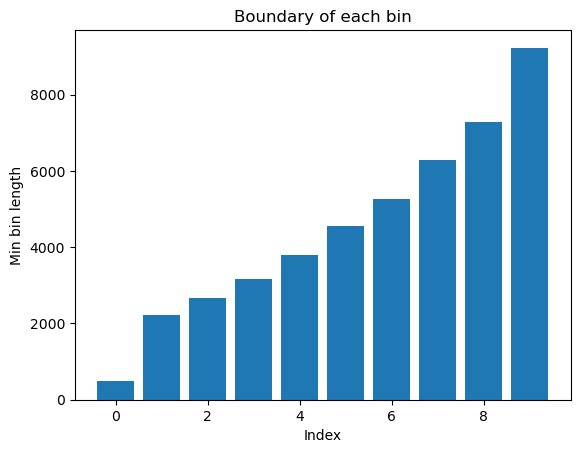

In [44]:
# get the mapping of salary bin with mean salary
label_bin_train = train_raw.salary_bin[:8000]



bins = []
equal_fre_bin = 10 
for i in label_bin_train.unique():
    each_group = train_raw[train_raw['salary_bin'] == i]
    bins.append(each_group['mean_salary'].min())
print(sorted(bins)) 

bins_sorted = sorted(bins)

x = range(len(bins_sorted))
plt.bar(x, bins_sorted)
plt.xlabel('Index')
plt.ylabel('Min bin length')
plt.title('Boundary of each bin')
plt.show()

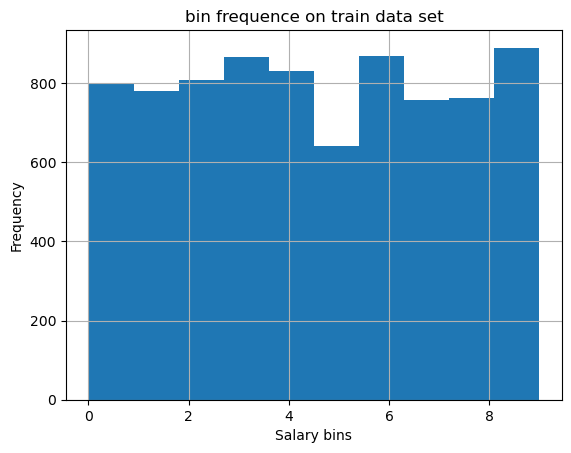

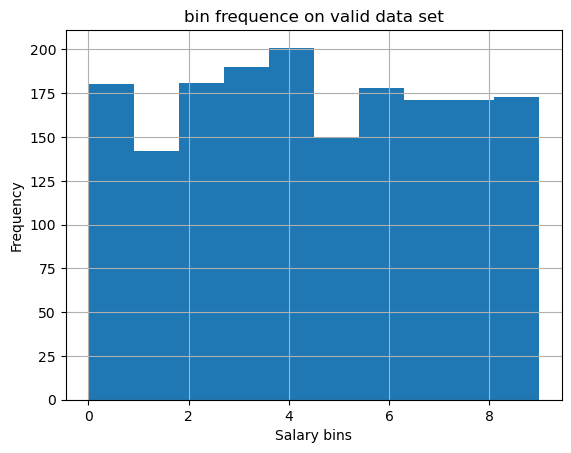

In [38]:
# draw graph of salray bin distribution
label_bin_train.hist()
plt.xlabel('Salary bins')
plt.ylabel('Frequency')
plt.title('bin frequence on train data set')
plt.show()


label_bin_val = valid_raw.salary_bin
label_bin_val.hist()
plt.xlabel('Salary bins')
plt.ylabel('Frequency')
plt.title('bin frequence on valid data set')
plt.show()


In [19]:
# train dataset on different model 

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


In [20]:

import time
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)



models = [GaussianNB(),
          DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1,p=1),
          MLPClassifier([800,400,200,100,50],max_iter=200,learning_rate='adaptive'),
          LogisticRegression(max_iter = 1000,solver='liblinear')]


titles = [
          'GNB',
          'Decision Tree 1',
          'KNN',
          'MLPClassifier',
          'Logistic Regression']

for title, model in zip(titles, models):
    model.fit(train_embeddings_label,label_bin_train)
    start = time.time()
    acc = model.score(valid_embeddings,label_bin_val)
    end = time.time()
    t = end - start
    print(title, "Accuracy:",acc, 'Time:', t)


# model1= GaussianNB()
# model2=KNeighborsClassifier(n_neighbors=1,p=2)
# model3=LogisticRegression(max_iter = 1000)


# estimators = [("GNB",model1),("KNN",model2),("LG",model3)]
# clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# clf.fit(train_embeddings_label,label_bin_train)
# acc = clf.score(valid_embeddings,label_bin_val)
# print("StackingClassifier Accuracy",acc)




GNB Accuracy: 0.22913068508923431 Time: 0.014780044555664062
Decision Tree 1 Accuracy: 0.1669545192861255 Time: 0.0008151531219482422
KNN Accuracy: 0.22164651698330454 Time: 0.7598462104797363
MLPClassifier Accuracy: 0.22394933793897526 Time: 0.026174306869506836
Logistic Regression Accuracy: 0.24179620034542315 Time: 0.0020058155059814453


In [21]:
for title, model in zip(titles, models):
    model.fit(train_embeddings_label,label_bin_train)
    start = time.time()
    pred = model.predict(valid_embeddings)
    acc = accuracy_score(label_bin_val,pred)
    end = time.time()
    t = end - start
    report = classification_report(label_bin_val, pred)
    print(title, "Accuracy:", acc, 'Time:', t)
    print(report)

GNB Accuracy: 0.22913068508923431 Time: 0.01271200180053711
              precision    recall  f1-score   support

           0       0.39      0.56      0.46       180
           1       0.20      0.31      0.24       142
           2       0.17      0.10      0.13       181
           3       0.17      0.09      0.12       190
           4       0.18      0.15      0.16       201
           5       0.18      0.09      0.12       150
           6       0.24      0.14      0.18       178
           7       0.17      0.15      0.16       171
           8       0.17      0.16      0.17       171
           9       0.25      0.54      0.34       173

    accuracy                           0.23      1737
   macro avg       0.21      0.23      0.21      1737
weighted avg       0.21      0.23      0.21      1737



/Users/steven/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/steven/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/steven/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree 1 Accuracy: 0.1669545192861255 Time: 0.0008099079132080078
              precision    recall  f1-score   support

           0       0.19      0.85      0.31       180
           1       0.00      0.00      0.00       142
           2       0.00      0.00      0.00       181
           3       0.00      0.00      0.00       190
           4       0.00      0.00      0.00       201
           5       0.00      0.00      0.00       150
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00       171
           8       0.00      0.00      0.00       171
           9       0.15      0.79      0.25       173

    accuracy                           0.17      1737
   macro avg       0.03      0.16      0.06      1737
weighted avg       0.03      0.17      0.06      1737

KNN Accuracy: 0.22164651698330454 Time: 0.7452049255371094
              precision    recall  f1-score   support

           0       0.43      0.34      0.38       180


In [24]:

import time
accuracies2 = []



models = [
          GaussianNB(),
          DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1,p=1),
          MLPClassifier([800,400,200,100,50],max_iter=200,learning_rate='adaptive'),
          LogisticRegression(max_iter = 1000,solver='liblinear')]


titles = [
          'GNB',
          'Decision Tree',
          'KNN',
          'MLPClassifier',
          'Logistic Regression']



for title, model in zip(titles, models):
    model.fit(train_tfidf_label ,label_bin_train)
    start = time.time()
    acc = model.score(valid_tfidf,label_bin_val)
    accuracies2.append(acc)
    end = time.time()
    t = end - start
    print(title, "Accuracy:",acc, 'Time:', t)




# model1= GaussianNB()
# model2=KNeighborsClassifier(n_neighbors=1,p=2)
# model3=LogisticRegression(max_iter = 1000)


# estimators = [("GNB",model1),("KNN",model2),("LG",model3)]
# clf=StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# clf.fit(train_embeddings_label,label_bin_train)
# acc = clf.score(valid_embeddings,label_bin_val)
# print("StackingClassifier Accuracy",acc)






GNB Accuracy: 0.21991940126655152 Time: 0.015918254852294922
Decision Tree Accuracy: 0.15659182498560736 Time: 0.0011889934539794922
KNN Accuracy: 0.1652274035693725 Time: 1.015549898147583
MLPClassifier Accuracy: 0.2135866436384571 Time: 0.041708946228027344
Logistic Regression Accuracy: 0.21934369602763384 Time: 0.0014109611511230469


In [25]:
for title, model in zip(titles, models):
    model.fit(train_tfidf_label ,label_bin_train)
    start = time.time()
    pred = model.predict(valid_tfidf)
    acc = accuracy_score(label_bin_val,pred)
    end = time.time()
    t = end - start
    report = classification_report(label_bin_val, pred)
    print(title, "Accuracy:", acc, 'Time:', t)
    print(report)

GNB Accuracy: 0.21991940126655152 Time: 0.015175819396972656
              precision    recall  f1-score   support

           0       0.37      0.62      0.46       180
           1       0.18      0.24      0.21       142
           2       0.20      0.18      0.19       181
           3       0.14      0.07      0.10       190
           4       0.20      0.11      0.14       201
           5       0.10      0.07      0.08       150
           6       0.18      0.12      0.14       178
           7       0.19      0.23      0.21       171
           8       0.15      0.13      0.14       171
           9       0.26      0.42      0.32       173

    accuracy                           0.22      1737
   macro avg       0.20      0.22      0.20      1737
weighted avg       0.20      0.22      0.20      1737

Decision Tree Accuracy: 0.15659182498560736 Time: 0.0010309219360351562
              precision    recall  f1-score   support

           0       0.14      0.95      0.25       180

/Users/steven/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/steven/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/steven/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Accuracy: 0.1652274035693725 Time: 1.0296788215637207
              precision    recall  f1-score   support

           0       0.36      0.13      0.19       180
           1       0.23      0.07      0.11       142
           2       0.32      0.09      0.14       181
           3       0.31      0.08      0.13       190
           4       0.35      0.09      0.14       201
           5       0.26      0.06      0.10       150
           6       0.32      0.07      0.11       178
           7       0.27      0.10      0.15       171
           8       0.46      0.10      0.16       171
           9       0.11      0.86      0.20       173

    accuracy                           0.17      1737
   macro avg       0.30      0.16      0.14      1737
weighted avg       0.30      0.17      0.14      1737

MLPClassifier Accuracy: 0.20437535981577432 Time: 0.04332423210144043
              precision    recall  f1-score   support

           0       0.40      0.26      0.31       180
    

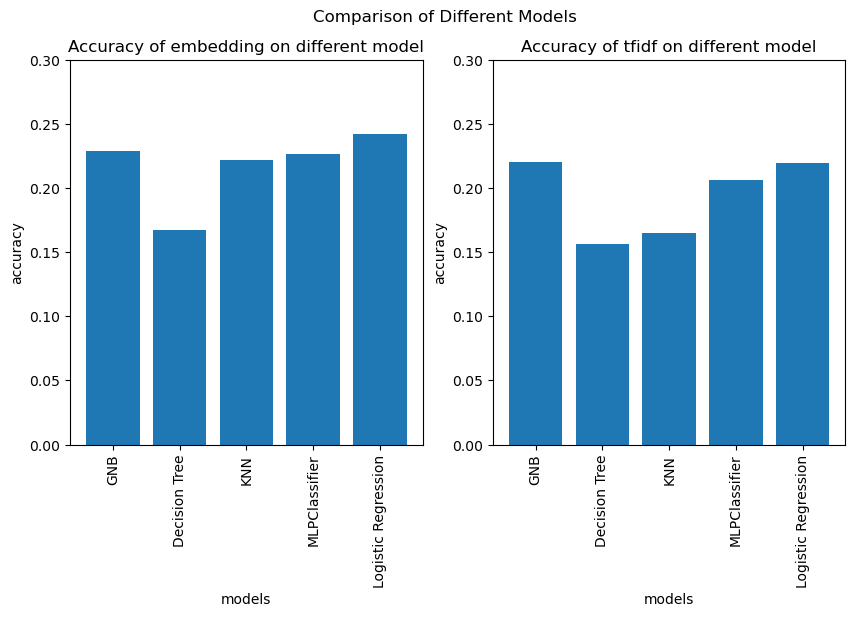

In [26]:
import time

# MultinomialNB(),
accuracies1 = []
accuracies2 = []





models = [
          GaussianNB(),
          DecisionTreeClassifier(max_depth=1),
          KNeighborsClassifier(n_neighbors=1,p=1),
          MLPClassifier([800,400,200,100,50],max_iter=200,learning_rate='adaptive'),
          LogisticRegression(max_iter = 1000,solver='liblinear')]


titles = [
          'GNB',
          'Decision Tree',
          'KNN',
          'MLPClassifier',
          'Logistic Regression']

for title, model in zip(titles, models):
    model.fit(train_embeddings_label,label_bin_train)
    start = time.time()
    acc = model.score(valid_embeddings,label_bin_val)
    accuracies1.append(acc)
    end = time.time()
    t = end - start



for title, model in zip(titles, models):
    model.fit(train_tfidf_label ,label_bin_train)
    start = time.time()
    acc = model.score(valid_tfidf,label_bin_val)
    accuracies2.append(acc)
    end = time.time()
    t = end - start

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for the first subplot
ax1.bar(titles, accuracies1)
ax1.set_xticks(range(len(titles)))
ax1.set_xticklabels(titles, rotation=90)
ax1.set_ylim([0, 0.3])
ax1.set_xlabel('models')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy of embedding on different model')

# Bar plot for the second subplot
ax2.bar(titles, accuracies2)
ax2.set_xticks(range(len(titles)))
ax2.set_xticklabels(titles, rotation=90)
ax2.set_ylim([0, 0.3])
ax2.set_xlabel('models')
ax2.set_ylabel('accuracy')
ax2.set_title('Accuracy of tfidf on different model')

# Set the title of the figure
fig.suptitle('Comparison of Different Models')

# Show the plot
plt.show()

In [27]:
# Tuning parts 

# GaussianNB()
from sklearn.model_selection import RandomizedSearchCV

parameters = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}
model = GaussianNB()
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(valid_embeddings, label_bin_val)

print("For GaussianN best Parameters:", clf.best_params_)
print("For GaussianN best Score:", clf.best_score_)
print("=========================================================")


# Tunning of decision tree
# the max depth of decsion tree is 30
baseline_model= [
    DecisionTreeClassifier(max_depth=1),
    DecisionTreeClassifier(max_depth=None)
]

titles = ['Decision-1',
          'Decision-None',
          ]
for title, model in zip(titles, baseline_model):
    model.fit(train_embeddings_label,label_bin_train)
    start = time.time()
    acc = model.score(valid_embeddings,label_bin_val)
    end = time.time()
    t = end - start


parameters = {'max_depth': range(1,31)}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1)
clf.fit(valid_embeddings, label_bin_val)

# print("Max depth of decision tree is ", baseline_model[1].get_depth())

print("For Decision tree best Parameters:", clf.best_params_)
print("For Decision tree best Score:", clf.best_score_)
print("=========================================================")


# KNeighborsClassifier()

parameters = {'n_neighbors': range(1,50,2),
              'p':[1,2]}
model = KNeighborsClassifier()
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(valid_embeddings, label_bin_val)

print("For KNN best Parameters:", clf.best_params_)
print("For KNN best Score:", clf.best_score_)
print("=========================================================")


# MLPClassifier() 
parameters = {'random_state': [1,2,3,4,5],
                'max_iter':range(100,500,100),
                'learning_rate': ['adaptive','constant','invscaling']}
                
model= MLPClassifier([800,400,200,100,50])
clf = RandomizedSearchCV(model, parameters, cv=5)
clf.fit(valid_embeddings, label_bin_val)
print("For MLPClassifier best Parameters:", clf.best_params_)
print("For MLPClassifier best Score:", clf.best_score_)
print("=========================================================")



# LogisticRegression(max_iter = 1000)
import warnings
warnings.filterwarnings('ignore')

parameters = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'multi_class': ['auto', 'ovr', 'multinomial'],
              'penalty' : ['l1' , 'l2', 'elasticnet', None]
              }
model= LogisticRegression()
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(valid_embeddings, label_bin_val)
print("For LogisticRegression best Parameters:", clf.best_params_)
print("For LogisticRegression best Score:", clf.best_score_)
print("=========================================================")



For GaussianN best Parameters: {'var_smoothing': 1e-10}
For GaussianN best Score: 0.21530524363178644
For Decision tree best Parameters: {'max_depth': 2}
For Decision tree best Score: 0.18250852959687303
For KNN best Parameters: {'n_neighbors': 21, 'p': 1}
For KNN best Score: 0.2066746165821988
For MLPClassifier best Parameters: {'random_state': 2, 'max_iter': 100, 'learning_rate': 'adaptive'}
For MLPClassifier best Score: 0.20320149723409192
For LogisticRegression best Parameters: {'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
For LogisticRegression best Score: 0.23603133591705588


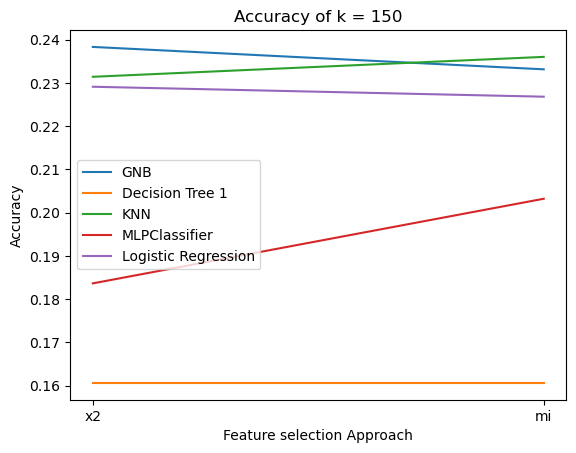

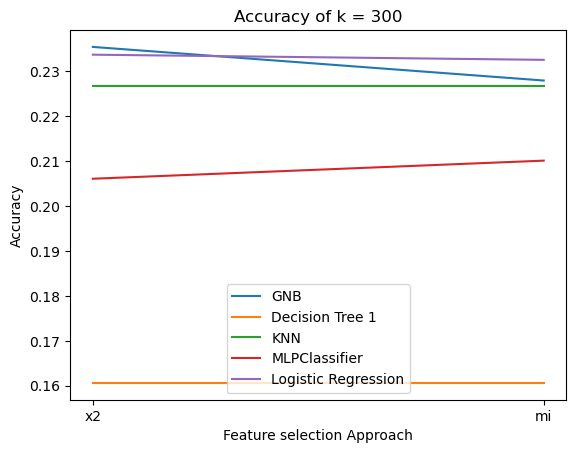

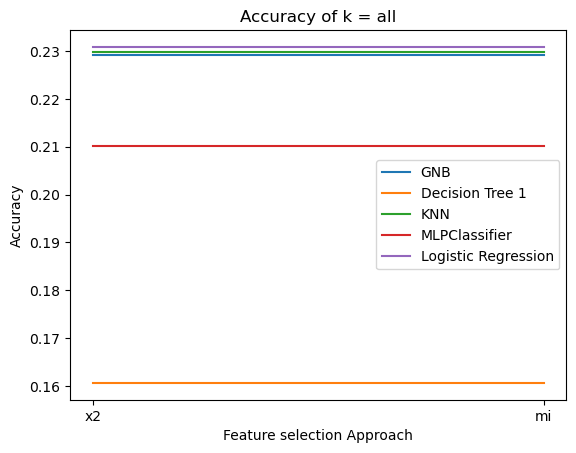

In [28]:
# Feature selction
# transform the negatice embedding feature into 0 to 1
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler(feature_range=(0, 1))

train_embedding_scaled = scaler.fit_transform(train_embeddings_label)
valid_sacled = scaler.transform(valid_embeddings)

k_range = [150,300,'all']




for k in k_range:

    x2 = SelectKBest(chi2, k=k)
    x2.fit(train_embedding_scaled,label_bin_train)
    X_train_x2 = x2.transform(train_embedding_scaled)
    X_test_x2 = x2.transform(valid_sacled)


    mi = SelectKBest(score_func=mutual_info_classif, k=k)
    mi.fit(train_embedding_scaled,label_bin_train)
    X_train_mi = mi.transform(train_embedding_scaled)
    X_test_mi = mi.transform(valid_sacled)


    Xs = [(X_train_x2, X_test_x2), (X_train_mi, X_test_mi)]
    X_names = ['x2', 'mi']

    tot_max_acc=[]




    models = [
        GaussianNB(var_smoothing=1e-10),
        DecisionTreeClassifier(max_depth=2),
        KNeighborsClassifier(n_neighbors=21,p=1),
        MLPClassifier([800,400,200,100,50],random_state=2, max_iter=200,learning_rate = 'adaptive'),
        LogisticRegression(solver='liblinear',multi_class='auto',penalty='l2')]


    titles = [
            'GNB',
            'Decision Tree 1',
            'KNN',
            'MLPClassifier',
            'Logistic Regression']
    acc_tot=[]
    for title, model in zip(titles, models):
        acc_list=[]
        # print('\n=========',title, '(with k=',k,'features): =========')
        for X_name, X in zip(X_names, Xs):
            X_train_t, X_test_t = X
            model.fit(X_train_t,label_bin_train)
            acc_list.append(model.score(X_test_t,label_bin_val))
        acc_tot.append( acc_list)
        # print(acc_list)
        
    plt.figure()
    plt.title('Accuracy of k = ' + str(k))
    plt.xlabel('Feature selection Approach')
    plt.ylabel('Accuracy')
    for i in range(len(titles)):
        plt.plot(X_names, [acc_tot[i][0], acc_tot[i][1]], label=titles[i])
    plt.legend()
    plt.show()


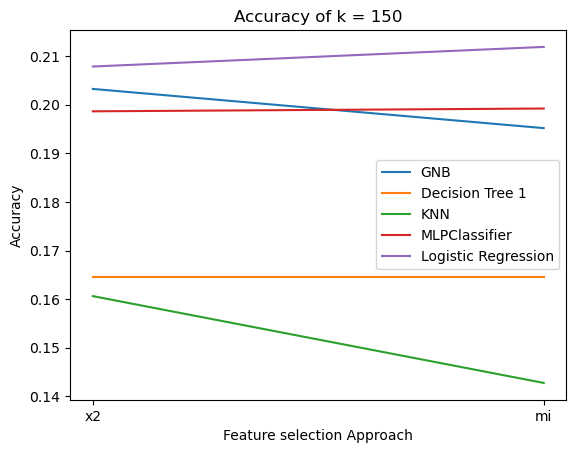

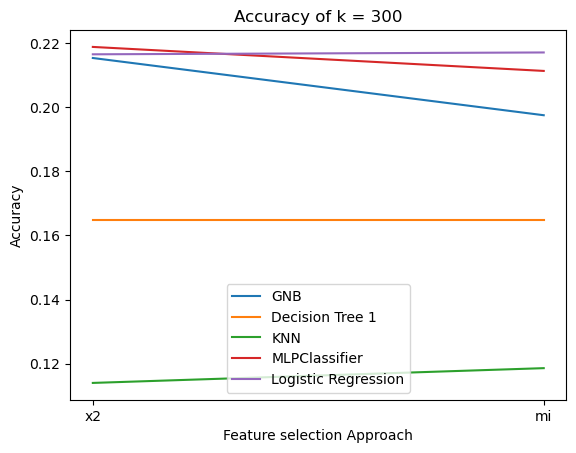

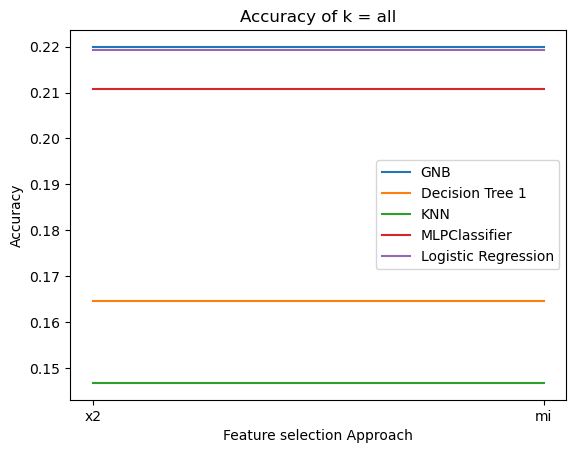

In [29]:
# Feature selction on tfidf dataset
# transform the negatice embedding feature into 0 to 1
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt



k_range = [150,300,'all']



for k in k_range:

    x2 = SelectKBest(chi2, k=k)
    x2.fit(train_tfidf_label,label_bin_train)
    X_train_x2 = x2.transform(train_tfidf_label)
    X_test_x2 = x2.transform(valid_tfidf)


    mi = SelectKBest(score_func=mutual_info_classif, k=k)
    mi.fit(train_tfidf_label,label_bin_train)
    X_train_mi = mi.transform(train_tfidf_label)
    X_test_mi = mi.transform(valid_tfidf)


    Xs = [(X_train_x2, X_test_x2), (X_train_mi, X_test_mi)]
    X_names = ['x2', 'mi']

 



    models = [
        GaussianNB(var_smoothing=1e-10),
        DecisionTreeClassifier(max_depth=2),
        KNeighborsClassifier(n_neighbors=21,p=1),
        MLPClassifier([800,400,200,100,50],random_state=2, max_iter=200,learning_rate = 'adaptive'),
        LogisticRegression(solver='liblinear',multi_class='auto',penalty='l2')]


    titles = [
            'GNB',
            'Decision Tree 1',
            'KNN',
            'MLPClassifier',
            'Logistic Regression']

    acc_tot=[]
    for title, model in zip(titles, models):
        acc_list=[]
        # print('\n=========',title, '(with k=',k,'features): =========')
        for X_name, X in zip(X_names, Xs):
            X_train_t, X_test_t = X
            model.fit(X_train_t,label_bin_train)
            acc_list.append(model.score(X_test_t,label_bin_val))
        acc_tot.append( acc_list)
        # print(acc_list)

    plt.figure()
    plt.title('Accuracy of k = ' + str(k))
    plt.xlabel('Feature selection Approach')
    plt.ylabel('Accuracy')
    for i in range(len(titles)):
        plt.plot(X_names, [acc_tot[i][0], acc_tot[i][1]], label=titles[i])
    plt.legend()
    plt.show()


In [30]:
# Research Question 1: Does Unlabelled data improve Job salary prediction?

# Semi-supervised learning

from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.calibration import CalibratedClassifierCV

# original_model= GaussianNB(var_smoothing=1e-10)
# semi_model = SelfTrainingClassifier(threshold=0.4,base_estimator=original_model)

unlabel_amount=5902

accuracy=[]
accuracy_1=[]

train_rest = pd.Series([-1]*unlabel_amount)

full_train_label = pd.concat([label_bin_train,train_rest])


# # new semi with 13000label

# semi_model.fit(train_embeddings,full_train_label)
# acc=semi_model.score(valid_embeddings,label_bin_val)

# print(acc)

# # original model with 8000label
# original_model.fit(train_embeddings_label,label_bin_train)
# acc=original_model.score(valid_embeddings,label_bin_val)

# print(acc)


model1= GaussianNB(var_smoothing=1e-10)
model2=KNeighborsClassifier(n_neighbors=21,p=1)
model3=LogisticRegression(solver='liblinear',multi_class='auto',penalty='l2')
model4=MLPClassifier([800,400,200,100,50],random_state=2, max_iter=200,learning_rate = 'adaptive')
estimators = [("GNB",model1),("KNN",model2),("LG",model3),("MLP",model4)]

models = [
    GaussianNB(var_smoothing=1e-10),
    DecisionTreeClassifier(max_depth=2),
    KNeighborsClassifier(n_neighbors=21,p=1),
    MLPClassifier([800,400,200,100,50],random_state=2, max_iter=200,learning_rate = 'adaptive'),
    LogisticRegression(solver='liblinear',multi_class='auto',penalty='l2'),
    StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='liblinear',multi_class='auto',penalty='l2'))]


titles = [
        'GNB',
        'Decision Tree 1',
        'KNN',
        'MLPClassifier',
        'Logistic Regression',
        'StackingClassifier']


for title, model in zip(titles, models):
    # if(model == Perceptron(max_iter=200, penalty='l1')):
    #     clf = CalibratedClassifierCV(base_estimator=model, cv='prefit')
    #     semi_model = SelfTrainingClassifier(threshold=0.4, base_estimator=clf)
    #     semi_model.fit(train_embeddings,full_train_label)
    #     acc1=semi_model.score(valid_embeddings,label_bin_val)
    #     print("Semi Supervised Accuracy:",acc1 )
    # else:
    model.fit(train_embeddings_label ,label_bin_train)
    print(model)
    start = time.time()
    acc = model.score(valid_embeddings,label_bin_val)
    accuracies2.append(acc)
    end = time.time()
    t = end - start
    accuracy.append(acc)
    print(title, "Accuracy:",acc, 'Time:', t)
    # print("==============================")
    semi_model = SelfTrainingClassifier(threshold=0.2,base_estimator=model)
    semi_model.fit(train_embeddings,full_train_label)
    acc1=semi_model.score(valid_embeddings,label_bin_val)
    accuracy_1.append(acc1)
    print("Semi Supervised Accuracy:",acc1 )
  

GaussianNB(var_smoothing=1e-10)
GNB Accuracy: 0.22913068508923431 Time: 0.01443934440612793
Semi Supervised Accuracy: 0.22337363270005758
DecisionTreeClassifier(max_depth=2)
Decision Tree 1 Accuracy: 0.16062176165803108 Time: 0.0008609294891357422
Semi Supervised Accuracy: 0.16119746689694875
KNeighborsClassifier(n_neighbors=21, p=1)
KNN Accuracy: 0.23028209556706966 Time: 0.9165103435516357
Semi Supervised Accuracy: 0.22682786413356362
MLPClassifier(hidden_layer_sizes=[800, 400, 200, 100, 50],
              learning_rate='adaptive', random_state=2)
MLPClassifier Accuracy: 0.20610247553252733 Time: 0.022032737731933594
Semi Supervised Accuracy: 0.22855497985031664
LogisticRegression(solver='liblinear')
Logistic Regression Accuracy: 0.24179620034542315 Time: 0.0016851425170898438
Semi Supervised Accuracy: 0.22855497985031664
StackingClassifier(estimators=[('GNB', GaussianNB(var_smoothing=1e-10)),
                               ('KNN',
                                KNeighborsClassifier

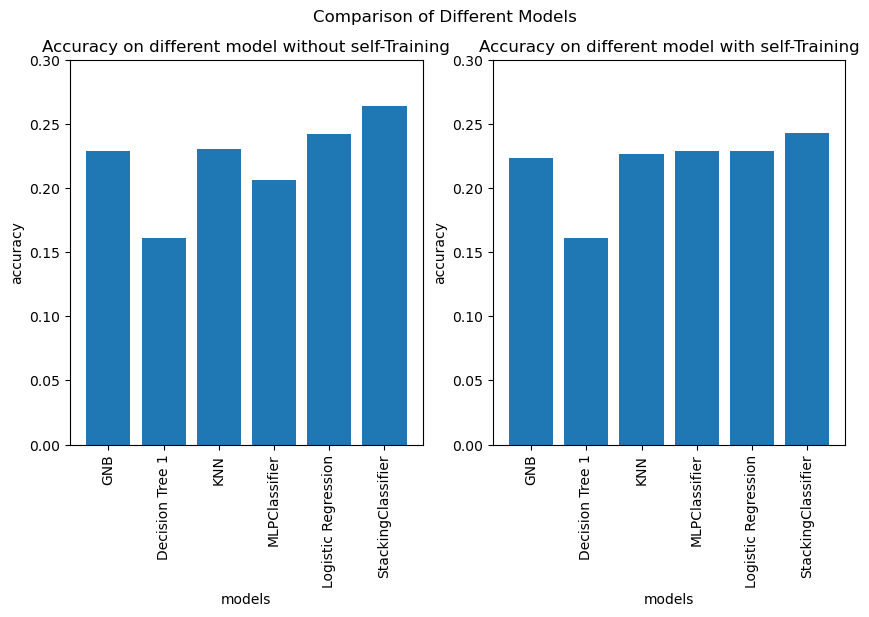

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for the first subplot
ax1.bar(titles, accuracy)
ax1.set_xticks(range(len(titles)))
ax1.set_xticklabels(titles, rotation=90)
ax1.set_ylim([0, 0.3])
ax1.set_xlabel('models')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy on different model without self-Training')

# Bar plot for the second subplot
ax2.bar(titles, accuracy_1)
ax2.set_xticks(range(len(titles)))
ax2.set_xticklabels(titles, rotation=90)
ax2.set_ylim([0, 0.3])
ax2.set_xlabel('models')
ax2.set_ylabel('accuracy')
ax2.set_title('Accuracy on different model with self-Training')

# Set the title of the figure
fig.suptitle('Comparison of Different Models')

# Show the plot
plt.show()

In [32]:
#  evaluation metric
# 这里过多的hidden laywer的话，会overfit
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


model1= GaussianNB(var_smoothing=1e-10)
model2=KNeighborsClassifier(n_neighbors=21,p=1)
model3=LogisticRegression(solver='liblinear',multi_class='auto',penalty='l2')
model4=MLPClassifier([800,400,200,100],random_state=2, max_iter=200,learning_rate = 'adaptive')
estimators = [("GNB",model1),("KNN",model2),("LG",model3),("MLP",model4)]

clf= StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver='liblinear',multi_class='auto',penalty='l2'))



clf.fit(train_embeddings_label ,label_bin_train)
print(clf)
start = time.time()
acc = clf.score(valid_embeddings,label_bin_val)
accuracies2.append(acc)
end = time.time()
t = end - start
print("StackingClassifier Accuracy:",acc, 'Time:', t)




StackingClassifier(estimators=[('GNB', GaussianNB(var_smoothing=1e-10)),
                               ('KNN',
                                KNeighborsClassifier(n_neighbors=21, p=1)),
                               ('LG', LogisticRegression(solver='liblinear')),
                               ('MLP',
                                MLPClassifier(hidden_layer_sizes=[800, 400, 200,
                                                                  100],
                                              learning_rate='adaptive',
                                              random_state=2))],
                   final_estimator=LogisticRegression(solver='liblinear'))
StackingClassifier Accuracy: 0.25964306275187105 Time: 0.7384860515594482


GaussianNB before self-training
KNeighborsClassifier before self-training
GaussianNB after self-training
KNeighborsClassifier after self-training


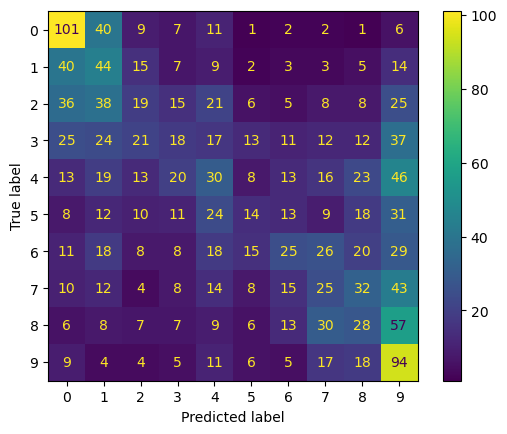

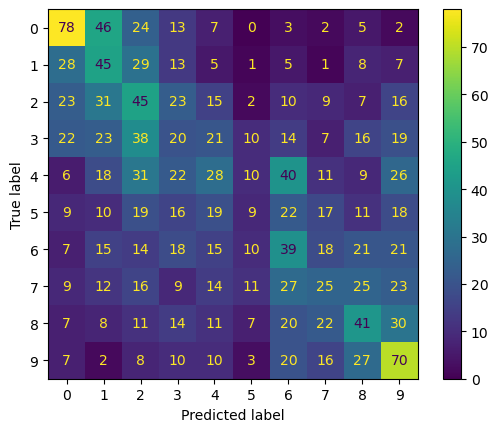

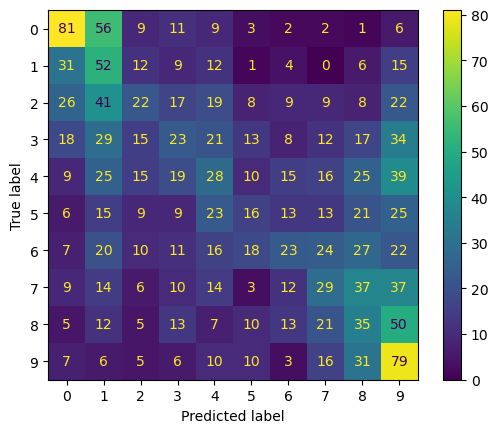

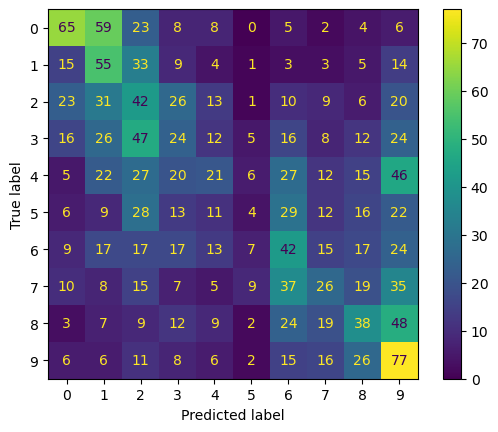

In [33]:
# before self-training
model1= GaussianNB(var_smoothing=1e-10)
model2=KNeighborsClassifier(n_neighbors=21,p=1)

print("GaussianNB before self-training")
model1.fit(train_embeddings_label ,label_bin_train)
pred = model1.predict(valid_embeddings)
precision_recall_fscore_support (label_bin_val,pred,average='macro')
ConfusionMatrixDisplay.from_predictions(label_bin_val,pred)

print("KNeighborsClassifier before self-training")
model2.fit(train_embeddings_label ,label_bin_train)
pred = model2.predict(valid_embeddings)
precision_recall_fscore_support (label_bin_val,pred,average='macro')
ConfusionMatrixDisplay.from_predictions(label_bin_val,pred)



# after self-training

model_1= GaussianNB(var_smoothing=1e-10)
model_2=KNeighborsClassifier(n_neighbors=21,p=1)

print("GaussianNB after self-training")
semi_model = SelfTrainingClassifier(threshold=0.2,base_estimator=model_1)
semi_model.fit(train_embeddings,full_train_label)
semi_pred = semi_model.predict(valid_embeddings)
precision_recall_fscore_support (label_bin_val,pred,average='macro')
ConfusionMatrixDisplay.from_predictions(label_bin_val,semi_pred)

print("KNeighborsClassifier after self-training")
semi_model = SelfTrainingClassifier(threshold=0.2,base_estimator=model_2)
semi_model.fit(train_embeddings,full_train_label)
semi_pred = semi_model.predict(valid_embeddings)
precision_recall_fscore_support (label_bin_val,pred,average='macro')
ConfusionMatrixDisplay.from_predictions(label_bin_val,semi_pred)

In [34]:
# output
pred = clf.predict(test_embeddings)
kaggle_competition = pd.DataFrame()
kaggle_competition['job_id'] =test_raw.job_id
kaggle_competition['salary_bin']=pred
kaggle_result = kaggle_competition.astype({'salary_bin':'int'})


In [35]:
kaggle_result.to_csv("submission.csv",index=False)